# Linear Classifiers in Python
> In this chapter you will learn the basics of applying logistic regression and support vector machines (SVMs) to classification problems. You'll use the scikit-learn library to fit classification models to real data.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Linear Classifiers in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## scikit-learn refresher


<div class=""><p>In this exercise you'll explore a subset of the <a href="http://ai.stanford.edu/~amaas/data/sentiment/" target="_blank" rel="noopener noreferrer">Large Movie Review Dataset</a>.
The variables <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code> are already loaded into the environment. The <code>X</code> variables contain features based on the words in the movie reviews, and the <code>y</code> variables contain labels for whether the review sentiment is positive (+1) or negative (-1).</p>
<p><em>This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the <a href="https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116" target="_blank" rel="noopener noreferrer">Scikit-Learn Cheat Sheet</a> and keep it handy!</em></p></div>

In [5]:
y = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/y_df_movies.csv')

!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_train.npz
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_test.npz

In [18]:
y_train = y['y_train'].values
y_test  = y['y_test'].values

In [17]:
import scipy.sparse
X_train = scipy.sparse.load_npz('X_train.npz')
X_test = scipy.sparse.load_npz('X_test.npz')

Instructions
<ul>
<li>Create a KNN model with default hyperparameters.</li>
<li>Fit the model.</li>
<li>Print out the prediction for the test example 0.</li>
</ul>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test[0])
print("Prediction for test example 0:", pred)

Prediction for test example 0: [1.]


**Looks like you remember how to use scikit-learn for supervised learning.**

### Comparing models

<div class=""><p>Compare k nearest neighbors classifiers with k=1 and k=5 on the handwritten digits data set, which is already loaded into the variables <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code>. You can set k with the <code>n_neighbors</code> parameter when creating the <code>KNeighborsClassifier</code> object, which is also already imported into the environment.</p>
<p>Which model has a higher test accuracy?</p></div>

<pre>
Possible Answers

k=1

<b>k=5</b>
</pre>

**You've just done a bit of model selection!**

### Overfitting

Which of the following situations looks like an example of overfitting?



<pre>
Possible Answers

Training accuracy 50%, testing accuracy 50%.

Training accuracy 95%, testing accuracy 95%.

<b>Training accuracy 95%, testing accuracy 50%.</b>

Training accuracy 50%, testing accuracy 95%.

</pre>

## Applying logistic regression and SVM


### Running LogisticRegression and SVC


In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9948032665181886
0.9533333333333334
1.0
0.4955555555555556


**Later in the course we'll look at the similarities and differences of logistic regression vs. SVMs.**

### Sentiment analysis for movie reviews


<div class=""><p>In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the <a href="http://ai.stanford.edu/~amaas/data/sentiment/" target="_blank" rel="noopener noreferrer">Large Movie Review Dataset</a>.</p>
<p>The variables <code>X</code> and <code>y</code> are already loaded into the environment. <code>X</code> contains features based on the number of times words appear in the movie reviews, and <code>y</code> contains labels for whether the review sentiment is positive (+1) or negative (-1).</p></div>

In [59]:
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/y_df_movies.csv')
df_vocab = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/vocab.csv')
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_train.npz

In [ ]:
def get_features(review):
    return vectorizer.transform([review])

In [85]:
vectorizer = CountVectorizer(vocabulary=vocab)
y = df['y_train']
X = sparse.load_npz('X_train.npz')

Instructions
<ul>
<li>Train a logistic regression model on the movie review data.</li>
<li>Predict the probabilities of negative vs. positive for the two given reviews.</li>
<li>Feel free to write your own reviews and get probabilities for those too!</li>
</ul>

In [88]:
# Instantiate logistic regression and train
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Review: LOVED IT! This movie was amazing. Top 10 this year.
Probability of positive review: 0.8078894556637186
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Probability of positive review: 0.5854910564829199


**The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered a "positive" word.**

## Linear classifiers


### Which decision boundary is linear?


<div class=""><p>Which of the following is a linear decision boundary?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choce_linear_boundary.png" alt=""></p></div>

<pre>
Possible Answers

<b>(1)</b>

(2)

(3)

(4)
</pre>

**You correctly identified the linear decision boundary.**

### Visualizing decision boundaries


<div class=""><p>In this exercise, you'll visualize the decision boundaries of various classifier types.</p>
<p>A subset of <code>scikit-learn</code>'s built-in <code>wine</code> dataset is already loaded into <code>X</code>, along with binary labels in <code>y</code>.</p></div>

In [90]:
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [92]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [95]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [97]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/wine_samples.csv')

In [127]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1]

Instructions
<ul>
<li>Create the following classifier objects with default hyperparameters: <code>LogisticRegression</code>, <code>LinearSVC</code>, <code>SVC</code>, <code>KNeighborsClassifier</code>.</li>
<li>Fit each of the classifiers on the provided data using a <code>for</code> loop.</li>
<li>Call the <code>plot_4_classifers()</code> function (similar to the code <a href="https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html" target="_blank" rel="noopener noreferrer">here</a>), passing in <code>X</code>, <code>y</code>, and a list containing the four classifiers.</li>
</ul>

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


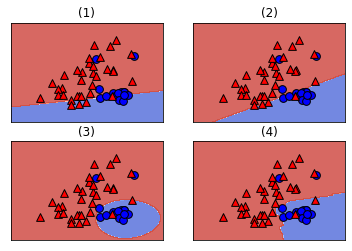

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(solver = 'liblinear'), LinearSVC(), SVC(gamma = 'auto'), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

**As you can see, logistic regression and linear SVM are linear classifiers whereas the default SVM and KNN are not.**